# 5. Data Extracting

In [54]:
import pandas as pd

data_clean = pd.read_csv('Dataset/ulasanapp_3000_hasillabeling.csv')
data_clean = pd.DataFrame(data_clean)

A = data_clean['text_tokens_stemmed']
B = data_clean['Label']

In [55]:
data_clean = data_clean.drop(columns=['score', 'text_clean', 'text_Stopword', 'text_tokens'])
# data_clean.drop(columns='content')
# split 80 20
from sklearn.model_selection import train_test_split
train_set, test_set, y_train, y_test = train_test_split(A, B, test_size=0.2, random_state=0)

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Handle missing values by filling them with an empty string
train_set = train_set.fillna('')

tfid_vectorizer = TfidfVectorizer()

train_set_tfid = tfid_vectorizer.fit_transform(train_set)
test_set_tfid = tfid_vectorizer.transform(test_set.fillna(''))


In [57]:
print(A.shape)
print(train_set_tfid.shape)

(2918,)
(2334, 3059)


In [58]:
train_set_tfid.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# 6. Penerapan Algoritma

# a. Naive Bayes

In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb = MultinomialNB()
nb.fit(train_set_tfid, y_train)

B_pred = nb.predict(test_set_tfid)

accuracy = accuracy_score(y_test, B_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


In [60]:
data_clean_baru = pd.DataFrame({'test_set': test_set, 'Label NB': B_pred})
data_clean_baru.to_csv('Dataset/ulasanapp_3000_hasil_sentimen_Ny_test.csv', index=False)

data_clean_baru.head()

,test_set,Label NB
380,maaf ulssannya palsu,positif
2598,terimakasih tokopedia seller mudah transaksi b...,positif
1774,aplikasi ombak terima otomatis pesan proses ce...,negatif
841,mantap,positif
22,baguss,positif


In [61]:
len(data_clean_baru)

584

C:\Users\anfiniti\AppData\Local\Temp\ipykernel_17732\3113226975.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = label_percentages[i]


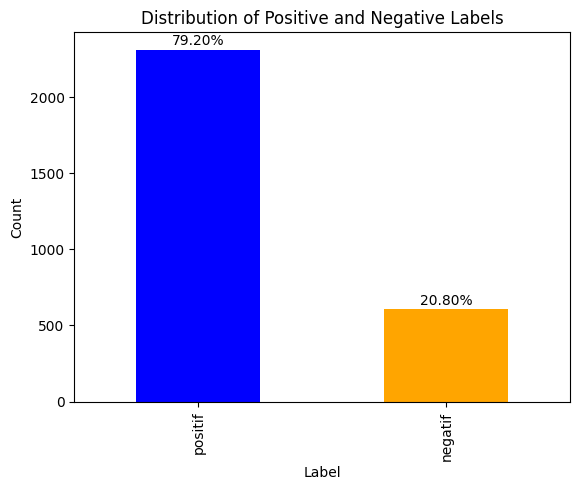

In [62]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = data_clean['Label'].value_counts()

# Calculate the percentages
label_percentages = (label_counts / label_counts.sum()) * 100

# Create a bar plot
ax = label_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Positive and Negative Labels')
plt.xlabel('Label')
plt.ylabel('Count')

# Add percentages on top of the bars
for i, count in enumerate(label_counts):
    percentage = label_percentages[i]
    ax.text(i, count + 10, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

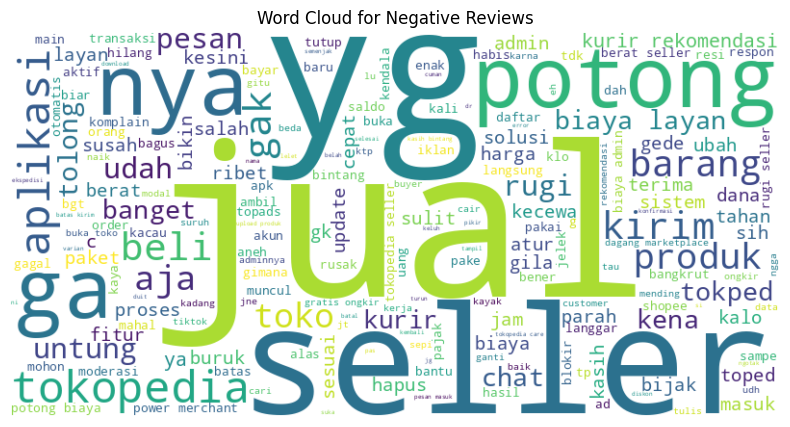

In [63]:
from wordcloud import WordCloud

# Filter negative reviews
negative_reviews = data_clean[data_clean['Label'] == 'negatif']['text_tokens_stemmed'].dropna()

# Combine all negative reviews into a single string
negative_text = ' '.join(negative_reviews)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

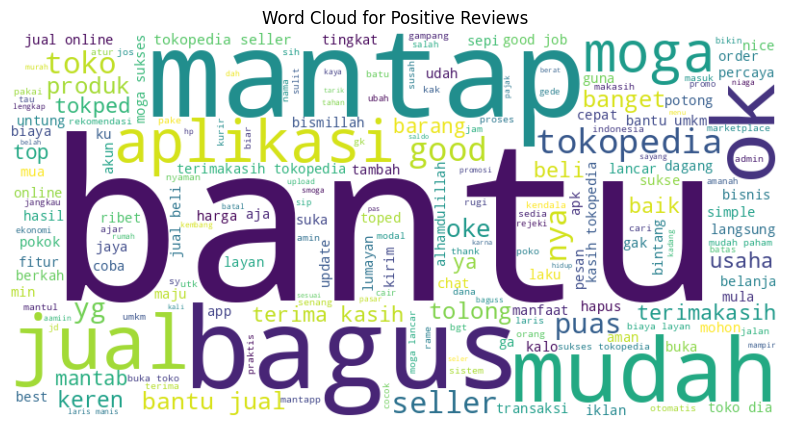

In [64]:
from wordcloud import WordCloud

# Filter negative reviews
negative_reviews = data_clean[data_clean['Label'] == 'positif']['text_tokens_stemmed'].dropna()

# Combine all negative reviews into a single string
negative_text = ' '.join(negative_reviews)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Classification Report

In [65]:
from sklearn.metrics import classification_report, accuracy_score

# Generate the classification report
report = classification_report(y_test, B_pred, target_names=['negatif', 'positif'])

# Print the classification report
print(report)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, B_pred)
print(f'Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

     negatif       0.86      0.54      0.67       123
     positif       0.89      0.98      0.93       461

    accuracy                           0.89       584
   macro avg       0.87      0.76      0.80       584
weighted avg       0.88      0.89      0.88       584

Accuracy: 0.89


# b. Support Vector Machine (SVM)

In [66]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
    svm = LinearSVC(C=c)
    svm.fit(train_set_tfid, B)
    print ("Accuracy for C=%s: %s" % (c, accuracy_score(B, svm.predict(train_set_tfid))))

svm = LinearSVC(C = 1)
svm.fit(train_set_tfid, B)

ValueError: Found input variables with inconsistent numbers of samples: [2334, 2918]

In [ ]:
B_pred = svm.predict(A_train_tfid)
data_clean['Label SVM'] = B_pred
data_clean.to_csv('Dataset/ulasanapp_3000_hasil_sentimen_SVM.csv', index=False)
data_clean.head()

,userName,at,content,text_tokens_stemmed,Label,Label NB,Label SVM
0,Pengguna Google,2024-12-31 12:40:46,"potongan nya skr sangat tidak masuk akal,sudh ...",potong nya skr masuk akalsudh 10,negatif,negatif,negatif
1,Pengguna Google,2024-12-31 12:36:03,Mending shopee daripada ini Ribet udah gitu ad...,mending shopee ribet udah gitu adminnya mahal ...,negatif,negatif,negatif
2,Pengguna Google,2024-12-31 12:29:26,Jualan makin susah hanya ada di Tokopedia Apli...,jual susah tokopedia aplikasi bug lemod sinyal...,negatif,positif,negatif
3,Pengguna Google,2024-12-31 11:12:47,Fitur chat antara pembeli dan penjual sekarang...,fitur chat beli jual filter filter bantu pesan...,negatif,negatif,negatif
4,Pengguna Google,2024-12-31 11:04:58,Bagus.,bagus,positif,positif,positif


In [12]:
data_clean.to_csv('Dataset/ulasanapp_3000_hasil_sentimen_NB_dan_SVM.csv', index=False)

In [13]:
loaddataclean = pd.read_csv('Dataset/ulasanapp_3000_hasil_sentimen_NB_dan_SVM.csv')
loaddataclean.head()

,userName,at,content,text_tokens_stemmed,Label,Label NB,Label SVM
0,Pengguna Google,2024-12-31 12:40:46,"potongan nya skr sangat tidak masuk akal,sudh ...",potong nya skr masuk akalsudh 10,negatif,negatif,negatif
1,Pengguna Google,2024-12-31 12:36:03,Mending shopee daripada ini Ribet udah gitu ad...,mending shopee ribet udah gitu adminnya mahal ...,negatif,negatif,negatif
2,Pengguna Google,2024-12-31 12:29:26,Jualan makin susah hanya ada di Tokopedia Apli...,jual susah tokopedia aplikasi bug lemod sinyal...,negatif,positif,negatif
3,Pengguna Google,2024-12-31 11:12:47,Fitur chat antara pembeli dan penjual sekarang...,fitur chat beli jual filter filter bantu pesan...,negatif,negatif,negatif
4,Pengguna Google,2024-12-31 11:04:58,Bagus.,bagus,positif,positif,positif
